In [40]:
#import 
import pandas as pd
import os
from scipy.misc import *
from matplotlib.pyplot import imread
# im = imread(image.png)
import cv2
from PIL import *

from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score , recall_score, confusion_matrix

In [22]:
dataset=pd.read_excel("./../../CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet.xlsx") ## read xls

In [30]:
dataset.head()

MyDigital Blur  Unnamed: 1
0   DiskR10_1.jpg            1
1  DiskR10_10.jpg            1
2  DiskR10_11.jpg            1
3  DiskR10_12.jpg            1
4  DiskR10_13.jpg            1

In [32]:
dataset.columns

Index(['MyDigital Blur', 'Unnamed: 1'], dtype='object')

In [33]:
dataset["Unnamed: 1"].value_counts()

 1    450
-1     30
Name: Unnamed: 1, dtype: int64

In [37]:
dataset[dataset["Unnamed: 1"]==-1]

MyDigital Blur  Unnamed: 1
450   Original_1.jpg           -1
451  Original_10.jpg           -1
452  Original_11.jpg           -1
453  Original_12.jpg           -1
454  Original_13.jpg           -1
455  Original_14.jpg           -1
456  Original_15.jpg           -1
457  Original_16.jpg           -1
458  Original_17.jpg           -1
459  Original_18.jpg           -1
460  Original_19.jpg           -1
461   Original_2.jpg           -1
462  Original_20.jpg           -1
463  Original_21.jpg           -1
464  Original_22.jpg           -1
465  Original_23.jpg           -1
466  Original_24.jpg           -1
467  Original_25.jpg           -1
468  Original_26.jpg           -1
469  Original_27.jpg           -1
470  Original_28.jpg           -1
471  Original_29.jpg           -1
472   Original_3.jpg           -1
473  Original_30.jpg           -1
474   Original_4.jpg           -1
475   Original_5.jpg           -1
476   Original_6.jpg           -1
477   Original_7.jpg           -1
478   Original_8.jpg           -1
479   Original_9.jpg           -1

In [42]:
## get the variance usig laplacian method
def variance_of_laplacian(image):
   
    return cv2.Laplacian(image, cv2.CV_64F).var()


In [43]:
# loop over the input images
def blur_notblur(imagePath):  # our classification method
   
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    text = -1
 
    if fm < 40:
        text = 1
    return text

In [44]:
from scipy.misc import imresize

temp_pred=[]
temp_orig=[]
for index, row in dataset.iterrows():
    img_name=row["MyDigital Blur"] ## get the images names from dataset
    img_path=os.path.join('./../../CERTH_ImageBlurDataset/CERTH_ImageBlurDataset/EvaluationSet/DigitalBlurSet',img_name)
#     print(img_path[:-1])
    temp_pred.append(blur_notblur(img_path[:-1]))  # predicted result 
    temp_orig.append(row[1])  ## original result

import numpy as np

y_pred=np.stack(temp_pred)
y_true=np.stack(temp_orig)

In [48]:

accuracy_score(y_true,y_pred)

0.9625

In [46]:
confusion_matrix(y_true,y_pred)

array([[ 22,   8],
       [ 10, 440]], dtype=int64)

In [47]:
fpr, tpr, threshold=roc_curve(y_true,y_pred)
roc_auc = metrics.auc(fpr, tpr)

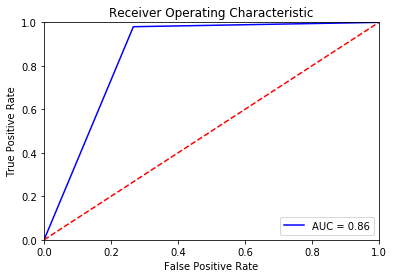

None


In [11]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()